# Dataset importing

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

#  Caricamento e preprocessing dei dati

In [20]:
img_height, img_width = 150, 150
batch_size = 32

# Generatore per dati di training con augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\HP\\Downloads\\archive (3)\\Training",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generatore per dati di test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\HP\\Downloads\\archive (3)\\Training",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Importante per l'analisi finale
)

Found 5712 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.


# Definizione del modello CNN

In [21]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classi (glioma, meningioma, notumor, pituitary)
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\HP\anaconda32\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

# Training del modello

In [22]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

C:\Users\HP\anaconda32\envs\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.4748 - loss: 1.1373 - val_accuracy: 0.7824 - val_loss: 0.6008
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 132s 734ms/step - accuracy: 0.7163 - loss: 0.7158 - val_accuracy: 0.7801 - val_loss: 0.5940
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 134s 747ms/step - accuracy: 0.7772 - loss: 0.6013 - val_accuracy: 0.8428 - val_loss: 0.4656
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 743ms/step - accuracy: 0.7908 - loss: 0.5594 - val_accuracy: 0.8146 - val_loss: 0.4732
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 138s 768ms/step - accuracy: 0.8105 - loss: 0.4969 - val_accuracy: 0.8636 - val_loss: 0.3758
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 136s 758ms/step - accuracy: 0.8333 - loss: 0.4612 - val_accuracy: 0.8718 - val_loss: 0.3621
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 744ms/step - accuracy: 0.8285 - loss: 0.4655 - val_accuracy: 0.8669 - val_loss: 0.3508
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 132s 739ms/step - accuracy: 0.8460 - lo

# Valutazione delle performance

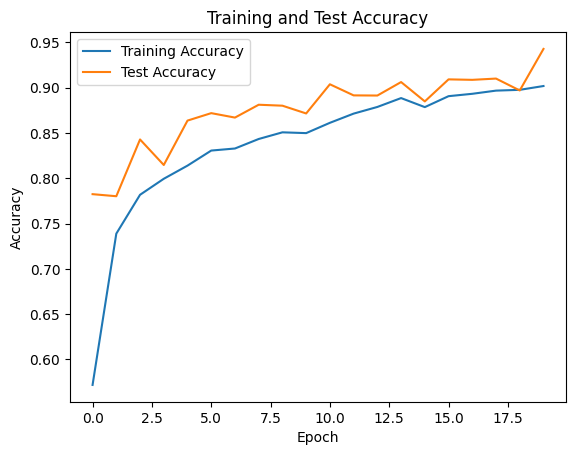

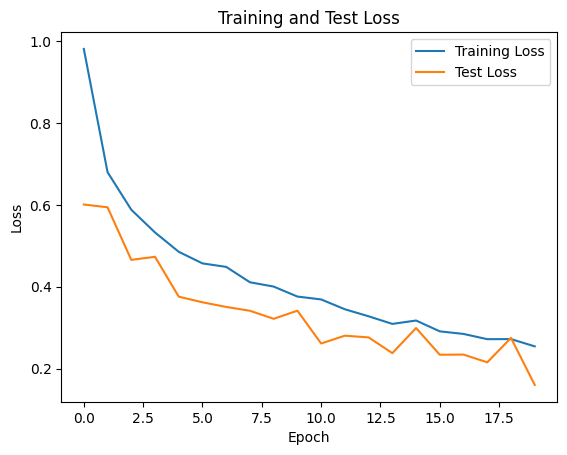

In [23]:
# Grafico Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

# Grafico Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.show()

### Matrice di confusione e classification report

179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step


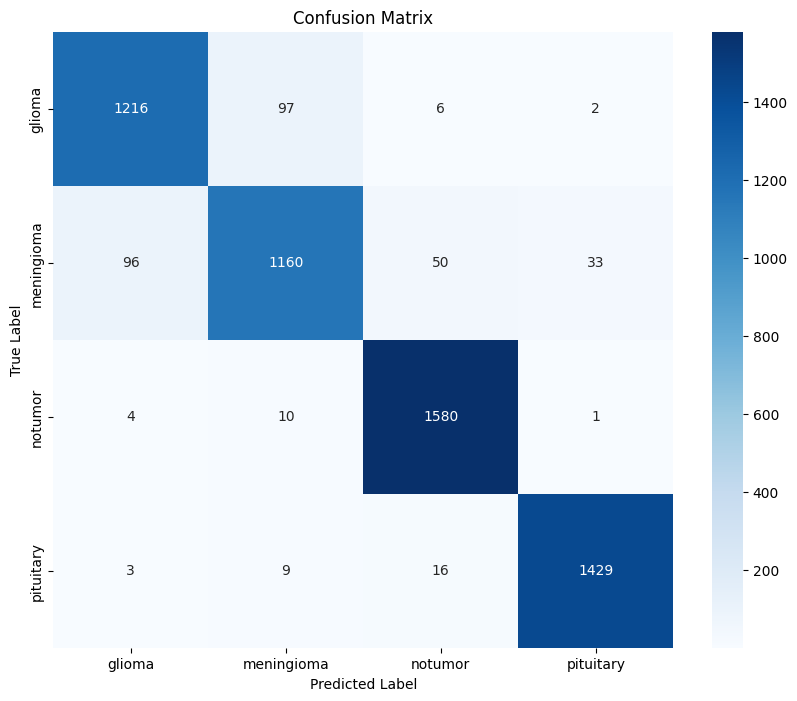

              precision    recall  f1-score   support

      glioma       0.92      0.92      0.92      1321
  meningioma       0.91      0.87      0.89      1339
     notumor       0.96      0.99      0.97      1595
   pituitary       0.98      0.98      0.98      1457

    accuracy                           0.94      5712
   macro avg       0.94      0.94      0.94      5712
weighted avg       0.94      0.94      0.94      5712



In [24]:
# Predizioni
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
y_pred_classes = np.argmax(predictions, axis=1)

# Matrice di confusione
cm = confusion_matrix(test_generator.classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(test_generator.classes, y_pred_classes, 
                            target_names=test_generator.class_indices.keys()))
